# 0. Abstract and Outline

The purpose of this document is to briefly introduce an important non-supervised learning method called clustering, with applications to Netflix data to cluster movies according to their features. As discussed at the beginning of this course, unsupervised learning means that we do not have a label ($Y$) to supervise/dictate whether our model makes sense. The goal of clustering is to split the feature space into different clusters so that data points in the same cluster are as close to each other as possible, whereas data points in different clusters are as far away from each other as possible. Both the modeling details, the case study, and the Python code are included in this document. 

Below is the outline of this document:

- In [Section 1](#section_1), we discuss clustering as a kind of unsupervised learning.

- In [Section 2](#section_2), we introduce the Netflix's moview genre clustering problem.

- In [Section 3](#section_3), we discuss the hierarchical clustering approach, with an application to the Netflix's movie genre clustering problem. 

- In [Section 4](#section_4), we discuss the $k-$means clustering approach, with an application to the Netflix's movie genre clustering problem.

<a id='section_1'></a>
# 1. Clustering as Unsupervised Learning

Unsupervised learning ([Wiki Page](https://en.wikipedia.org/wiki/Unsupervised_learning)) refers to one type of machine learning that seeks to find patterns, relationships, and structures in data, without being optimized to solve a particular predictive task (i.e., there is no outcome variable $Y$ associated with the problem). **Clustering** refers to a specific type of unsupervised models the goal of which is to segment data into a set of homogeneous clusters of observations to generate insights. Although clustering models do not have a label $Y$, one usually utilizes the clustering results as features or labels to devise follow-up predictive models and/or actionable strategies. Typical examples of clustering include:

- **Image segmentation:** To segment image into different parts. The segmentation results may be used for facial recognition, for example.  
- **Customer segmentation:** To segment customers into different classes. The firm may adopt different promotional strategies to different customer segments.
- **Product segmentation:** To segment products into different classes. A seller may target different customers with different product segments.

In this document, we denote the training set for clustering as $\mathcal D=\{X_{ij},1\le i\le n,1\le j\le p\}$, which only has features, but not the outcome variable. The goal of clustering is to split the data set $\mathcal D$ into $k$ non-overlapping clusters $\mathcal C_1,\mathcal C_2,...,\mathcal C_k$ such that $\cup_{1\le l\le k}\mathcal C_l=\mathcal D$ and $\mathcal C_l \cap\mathcal C_m=\emptyset$ for $l\ne m$. At a high level, the objective for clustering is:

-----------

<font color="red">

- **Within-group-homogeneity**: Observations in the **same** group should be **similar** to each other.
- **Cross-group-heterogeneity**: Observations in **different** groups should be **disimilar** to each other.

</font>
    
--------------

Here similarity and disimilarity are measured by distances. Before discussing the definitions of distances between data points and between clusters, we first illustrate clustering as the following figures:

<img src="clustering-original.png" width=300>


If we want to cluster the data observations into 3 segments, we have:

<img src="clustering-3.png" width=300>

If we want to cluster the data observations into 4 segments, we have:

<img src="clustering-4.png" width=300>

It is also important to understand the high-level purposes of clustering:

- **Data Exploration:** You may use clustering for some initial data exploration to understand whether the data are coherently splitted into groups and, if so, how many groups there are. 

- **Data Partitioning:** You may also want to divide the data into different groups before further processing. It is possible that you train different supervised learning models on different groups.

- **Unsupervised feature extraction:** Clustering is also a natural approach to generate additional features. For example, you could add the group labels or the cluster distances into the feature space.

## 1.1. Distances between Data Observations and Clusters

Clustering relies on the measure of distance both between data observations and between clusters. As discussed in the document for the $k$NN model, we assume the feature space is associated with a distance function (sometimes also called norm, see [Wiki Page](https://en.wikipedia.org/wiki/Norm_(mathematics))), which we denote as $d(X_1,X_2)$, which measures the distance between two features $X_1$ and $X_2$. In most applications, we use the Euclidean distance (sometimes also called the Euclidean norm or the $L^2-$norm, see [Wiki Page](https://en.wikipedia.org/wiki/Euclidean_distance)) most often. For two features $X_1=(X_{11},X_{12},...,X_{1p})$ and $X_2=(X_{21},X_{22},...,X_{2p})$, their Euclidean distance is given by

$$d(X_1,X_2)=\sqrt{\sum_{j=1}^p(X_{1j}-X_{2j})^2}$$

Based on the distance between different data observations, we could define various distances between two clusters $\mathcal C_1$ and $\mathcal C_2$:

- **Single linkage:** Distance between points that are closest to each other:
$$\min d(X_i,X_j)\mbox{ where }X_i\in\mathcal C_1,X_j\in\mathcal C_2$$
- **Complete linkage:** Distance between points that are farthest to each other:
$$\max d(X_i,X_j)\mbox{ where }X_i\in\mathcal C_1,X_j\in\mathcal C_2$$
- **Average linkage:** Average distance computed over all pairs of observations in the two clusters:
$$\mbox{Average of } d(X_i,X_j)\mbox{ where }X_i\in\mathcal C_1,X_j\in\mathcal C_2$$
- **Average group linkage:** Distance between centers of each cluster:
$$d(\mu_1,\mu_2)\mbox{ where }\mu_i\mbox{ is the center of }\mathcal C_i,\mbox{ i.e., }\mu_i=\frac{1}{|\mathcal C_i|}\sum_{j\in \mathcal C_i}X_j$$
where $|\mathcal C_i|$ is the number of observations in $\mathcal C_i$.
- **Ward's method:** How much the sum of squares will increase if we merge them:
$$\sqrt{\frac{n_1n_2}{n_1+n_2}}d(\mu_1,\mu_2),\mbox{ where }\mu_i\mbox{ is the center of }\mathcal C_i,\mbox{ and }n_i=|\mathcal C_i|\mbox{ is the number of observations in $\mathcal C_i$}$$


To conclude this section, we remark that, because clustering involves working with distances, it is necessary to preprocess the data set $\mathcal D$ by **standardization** or **normalization**. Besides the common standardization approach to substract mean and divide by standard deviation, we could also use the following normalization approach to normalize by the range of the feature:

$$\tilde X_{ij}=\frac{X_{ij}-X_j^{\min}}{X_j^{\max}-X_j^{\min}},$$
where $X_j^{\max}=\max\{X_{ij}:1\le i\le n\}$ and $X_j^{\max}=\min\{X_{ij}:1\le i\le n\}$. By definition, this normalization will pull all the features to the range $[0,1]$. **Question**: Why we do not need to the data preprocessing of normalization or standardization for the movie genre case (presented below)? 

In the following, we first introduce the Netflix movie genre clustering problem. Then, we present two most intuitive clustering models and discuss how they can be used in the Netflix movie genre case.

<a id='section_2'></a>
# 2. Netflix Genre Clustering

Netflix is the world's largest online streaming (and DVD rental) platform with more than 167 million subscribers and a total revenue of more than 20 billion US dollars (as of 2019). Among others, offering accurate movie recommendations to its customers is Netflix's key operational decisions. An important step in Netflix's recommendation strategy is to cluster movies into different groups according to the genres they belong.

Specifically, movies are categorized into different genres, such as action, adventure, animation, etc. Each movie may belong to many genres. Our goal is, therefore, **To systematically find groups of movies with similar sets of genres.**

The data set was from MovieLens, an online movie rating platform. The core variables in this data set is a group of dummy (0-1) variables indicating whether the movie belongs to the respective genre. Most of the genre names are self-explanatary:

- **Unknown**: The genre is unknown;
- **Action**
- **Adventure**
- **Animation**
- **Children**
- **Comedy**
- **Crime**
- **Documentary**
- **Drama**
- **Fantasy**
- **FilmNoir**: Stylish Hollywood crime dramas;
- **Horror**
- **Musical**
- **Mystery**
- **Romance**
- **SciFi**: Science fiction;
- **Thriller**
- **War**
- **Western**

To begin with, we load the data , and take a look at the first few rows. 

In [1]:
# Import necessary packages
import sys 
import numpy as np
import pandas as pd
import statsmodels as sm
import sklearn
import scipy as sp
%matplotlib inline 
import matplotlib.pyplot as plt
import random

# Set the random seed such that the results are replicable.

random.seed(666)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
movie_original = pd.read_csv("movieLens.csv")
movie_original.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Next, we do some data preprocessing to remove some unnecessary variables.

In [3]:
movie = movie_original.drop(columns = ['ID','ReleaseDate','VideoReleaseDate','IMDB','Title'])

<a id='section_3'></a>
# 3. Hierarchical Clustering

Hierarchical clustering (sometimes also referred to as agglomerative clustering) is an intuitive clustering algorithm. The clustering method starts with each data observation in a cluster of its own. Then, it greedily merges the two most similar clusters. Specifically, the hierarchical clustering algorithm works as follows:

---------------

<font color="red">

- **Input and Initialization:** Each data point of $\mathcal D$ is in a cluster of its own. The number of clusters $k$.
- **Step 1:** Find the cloest pairs of clusters and merge them.
- **Step 2:** If there is only one cluster, **stop** and **output** the tree of cluster mergers. Otherwise, **repeat Step 1**.

</font>    
    
---------------

Graphically, we illustrate the above procedure as follows:

<img src="hierachical.png" width=1000>

The dendogram output can be illustrated as follows:

<img src="hie.png" width=1000>

As we can see from the figure above, the hight of the vertical lines represents the distance between different points and/or clusters. So, it is easy for the modeler to graphically select how many clusters should we have.

One should also note that, if we choose different distances between clusters described in Section 1.1 (or different linkage criteria), the model output will be quite different, even if we fix the number of clusters $k$. We illustrate this point with the following figure (with single linkage, average linkage, complete linkage, and Ward distance; $k=5$):

<img src="distances.png" width=1000>

For these 4 distances, the number of data points in each cluster is:

<table style="width:50%">
  <tr>
    <th>Distance </th>
    <th>$\mathcal C_0$</th> 
    <th>$\mathcal C_1$</th> 
     <th>$\mathcal C_2$</th> 
      <th>$\mathcal C_3$</th> 
          <th>$\mathcal C_4$</th> 
    </tr>
  <tr>
    <td>Single</td>
    <td>92</td>
<td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
    </tr>
 <tr>
    <td>average</td>
    <td>82</td>
<td>9</td>
      <td>7</td>
      <td>1</td>
      <td>1</td>
    </tr>
<tr>
    <td>complete</td>
    <td>50</td>
<td>24</td>
      <td>14</td>
      <td>11</td>
      <td>1</td>
    </tr>
<tr>
    <td>Ward:</td>
    <td>31</td>
<td>30</td>
      <td>20</td>
      <td>10</td>
      <td>9</td>
    </tr>
</table>

As we can see, the Ward distance leads to more equally sized clusters in hierarchical clustering. In practice, Ward distance is the default choice.

Before running the hierarchical clustering algorithm on the Netflix movie genre data set, we first discuss some pros and cons of hierarchical clustering.

-----------

- **Speed:** In general, hierarchical clustering is **very slow (not scalable)** since it needs to compute the distances between clusters in each round of the procedure. 
- **Imbalanced:** For some linkage criteria (distances), hierarchical clustering will lead to very imbalanced cluster sizes, e.g., single linkage.
- **Completeness:** Hierarchical clustering gives more holistic view than a single clustering approach.

------------

## 3.1. Hierarchical Clustering in Action

Next, we apply hierarchical clustering to segment different movies accourding to the genres they belong to. To begin with, we need to compute the distances between different observations in $\mathcal D$.

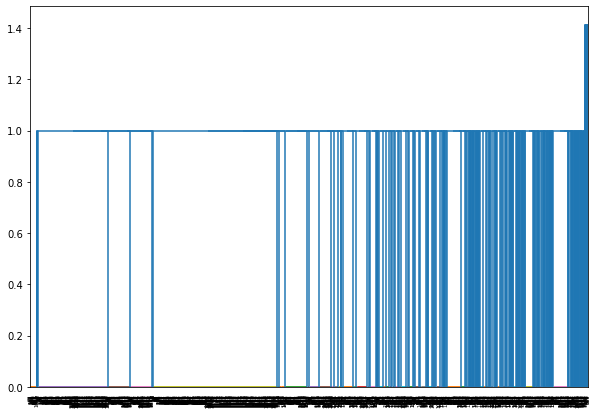

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(movie, 'single')


plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

As we can see, the dendrogram for the hierarchical clustering applied to the moview genre data set is very complex. We set the number of clusters to 10 and compute the percentage of movies in the action and romance genres of each cluster.

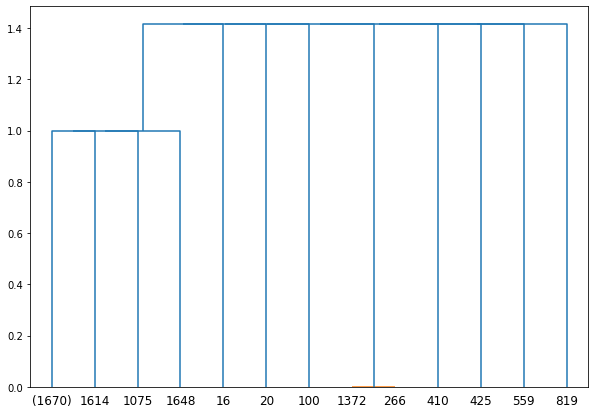

In [6]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
           p = 10,
           truncate_mode = 'level',
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [7]:
#Train Hierarchical Clustering trianing model

from sklearn.cluster import AgglomerativeClustering as HieClustering

clustering1 = HieClustering(n_clusters=10,linkage='ward').fit(movie)

# Report the index to which a data point belongs
clustering1.labels_

array([1, 5, 6, ..., 3, 0, 4])

In [8]:
movie_clustered = movie_original.copy()
movie_clustered['cluster'] = clustering1.labels_

In [9]:
for i in range(10):
    cluster = movie_clustered.loc[movie_clustered['cluster'] == i]
    total = cluster.shape[0]
    action = cluster.loc[cluster['Action'] == 1].shape[0]
    romance = cluster.loc[cluster['Romance'] == 1].shape[0]
    print('Cluster %d'%(i))
    print('The percentage for action is %.2f percent'%(100 * action/total))
    print('The percentage for romance is %.2f percent'%(100 * romance/total))
    print('-----------------------------------------')

Cluster 0
The percentage for action is 8.08 percent
The percentage for romance is 22.01 percent
-----------------------------------------
Cluster 1
The percentage for action is 6.47 percent
The percentage for romance is 2.88 percent
-----------------------------------------
Cluster 2
The percentage for action is 0.00 percent
The percentage for romance is 0.00 percent
-----------------------------------------
Cluster 3
The percentage for action is 16.67 percent
The percentage for romance is 100.00 percent
-----------------------------------------
Cluster 4
The percentage for action is 5.94 percent
The percentage for romance is 0.00 percent
-----------------------------------------
Cluster 5
The percentage for action is 79.76 percent
The percentage for romance is 0.00 percent
-----------------------------------------
Cluster 6
The percentage for action is 4.38 percent
The percentage for romance is 8.03 percent
-----------------------------------------
Cluster 7
The percentage for action 

Let's extract a cluster now.

In [10]:
movie_2 = movie_clustered.loc[movie_clustered['cluster'] == 2]

Then, we look at the first 10 titles in this cluster.

In [11]:
for i in movie_2['Title'][:10]:
    print(i)

Crumb (1994)
Hoop Dreams (1994)
Brother Minister: The Assassination of Malcolm X (1994)
Haunted World of Edward D. Wood Jr., The (1995)
Maya Lin: A Strong Clear Vision (1994)
Frighteners, The (1996)
Shining, The (1980)
Young Frankenstein (1974)
Nightmare on Elm Street, A (1984)
Paradise Lost: The Child Murders at Robin Hood Hills (1996)


<a id='section_4'></a>
# 4. $k-$Means Clustering

Another (probably more) widely used clustering algorithm is the so called $k-$means clustering. The idea of $k-$means is to minimize the sum of squared distance between each data point in $\mathcal D$ and the center of the cluster it belongs to. Specifically, we define the center of $\mathcal C_l$ as $C_l$ and $C(X_i)$ as the cluster center $C_l$ closest to $X_i$:

<font color="red">

$$\min_{(C_1,C_2,...,C_k)}\sum_{i=1}^n d^2(X_i,C(X_i))$$

</font>

This above optimization problem, unfortunately, is NP-hard ([Wiki Page](https://en.wikipedia.org/wiki/NP-hardness)). However, we have the socalled $k-$means algorithm as an efficient heuristic to obtain the clusters. The algorithms works as follows:

------------

<font color="red">

- **Initialization:** **Input** data set $\mathcal D$ and the number of clusters $k$.
- **Step 1:** Pick $k$ random points $\{C_1,C_2,...,C_k\}$ in the feature space as the cluster centers. 
- **Step 2:** Assign each data point $X_i$ to its closest cluster center $C(X_i)$.
- **Step 3:** Re-compute the cluster centers $\{C_1,C_2,...,C_k\}$. If the cluster centers do not change, **stop** and **output** $\{C_1,C_2,...,C_k\}$. Otherwise, **repeat Step 2**.

</font>

--------

The $k-$means algorithm is one version of the **Expectation-Maximization (EM)** algorithms, a broad family of machine learning algorithms used for prediction. Step 2 is the maximization (implemented as a minimization here) stage whereas Step 2 is the expectation stage of the $k-$NN algorithm. See this [Wiki Page](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) for more. We illustrate the $k-$means algorithm using the following figure:

<img src="kmeans.png" width=1000>

A key question in $k-$Means clustering algorithm is how to set the number of clusters $k$. We define the total dissimilarity of a clustering structure $\{C_1,C_2,...,C_k\}$ as

$$W=\sum_{i=1}^nd^2(X_i,C_l),\mbox{ where }C_l\mbox{ is the cluster center closest to }X_i.$$

In general, $W$ will decrease as $k$ increases. The way to pick up the optimal $k^*$ is to find the number of clusters $k$ where there is a **sharp decrease in successive differences** of $W$. This is called the "elbow method", as illustrated in the following figure.


<img src="elbow.png" width=700>


Although $k-$Means is a non-supervised learning algorithm, we can actually use a $k-$Means fitted on a training set to make predictions of which cluster a new data observation in the testing set belongs to. Specifically, in $k-$Means model, the clusters are fully determined by the cluster centers: Clusters are partion of the feature space into regions closest to each of the cluster centers. This is called Voronoi diagrams of the cluster centers. Therefore, for a new data observation $X$, we only needs to find the center that is closest to $X$, $C(X)=C_l$, and assigns a label $\mathcal C_l$ to this new data point. We illustrate the partition of the feature space for $k-$means as the following figures, the left of which is with $k=15$ and the right of which is with $k=5$.

<img src="voronoi.png" width=1000>

The above nature of the $k-$Means algorithm suggests that the cluster boundaries are equivi-distant to the cluster centers. This will give rise to two limitations of the $k-$means algorithm. In either case, more advanced clustering methods should be adopted.

- **Correlations.** $k-$Means captures distances better than correlations, as illustrated by the following figure:

<img src="cov.png" width=750>

In this case, the Gaussian Mixture Model (GMM, [Wiki Page](https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model)) will work (much) better.

- **Shapes.** $k-$Means cannot model complex shapes, as shown in the following figure:

<img src="simple.png" width=750>

In this case, it is recommended that you use the manifold learning model ([Wiki Page](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Manifold_learning_algorithms)).

Finally, we compare the hierarchical clustering approach and the $k-$means clustering approach.

--------------------

- **Hierarchical Clustering** works well for small data sets. It is a convenient method if one is not sure about the number of clusters since it reports the results for all $k$'s between 1 and $n$. Another benefit is that one can visualize how clusters are nested.
- **$k-$means Clustering** is suitable for a large data set if we know the number of clusters $k$. If not, one can use the elbow approach to determine the optimal value of $k$. As an unsupervised learning approach, $k-$means actually minimizes the squared error, which makes $k-$means a well-defined optimization problem. $k-$means dicates that cluster boundaries equi-distant to the centers, which makes the model incompetent for data with correlations and the clusters with complex shapes.

---------------------

Next, we will apply the $k-$means model to the movies lens data set for clustering.

## 4.1. $k-$Means in Action

We now discuss how to implement the $k-$means model with the movie lens data. 

Because $k-$means has some random initialization, the results may be different for different computers. Next, we run the $k-$means algorithm based on $\mathcal D$.

In [12]:
movie.shape

(1682, 19)

In [13]:
#Train k-means model

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=666, max_iter=1000,init='k-means++').fit(movie)
print(kmeans.labels_)

##For a new data point of a moview, predict which cluster it belongs to.
print(kmeans.predict([[0,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,1]]))

##The center of each cluster
print(kmeans.cluster_centers_)

[3 2 2 ... 0 3 4]
[0]
[[ 6.50521303e-19  8.39160839e-02  5.59440559e-02  6.99300699e-03
   1.39860140e-02  7.69230769e-02  4.19580420e-02 -6.93889390e-18
   6.85314685e-01 -1.73472348e-18  6.93889390e-18  6.99300699e-03
   3.49650350e-02  1.39860140e-02  1.00000000e+00  6.99300699e-03
   2.79720280e-02  9.09090909e-02  6.99300699e-03]
 [ 6.23052960e-03  3.11526480e-01  2.49221184e-01  9.03426791e-02
   1.90031153e-01  6.23052960e-03  8.09968847e-02  1.43302181e-01
   1.66533454e-16  3.42679128e-02  2.49221184e-02  1.74454829e-01
   6.23052960e-02  3.42679128e-02  9.34579439e-03  1.52647975e-01
   0.00000000e+00  4.36137072e-02  4.67289720e-02]
 [ 8.67361738e-19  3.54430380e-01  8.86075949e-02  8.43881857e-03
   4.21940928e-03  1.68776371e-02  1.39240506e-01  6.93889390e-18
   2.36286920e-01  4.21940928e-03  5.90717300e-02  8.01687764e-02
   4.21940928e-03  1.30801688e-01  6.32911392e-02  1.39240506e-01
   1.00000000e+00  2.10970464e-02  3.46944695e-18]
 [ 6.50521303e-19  5.73770492e-02

/Users/rphilipzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Next, we use the elbow method to select the optimal number of clusters for $k-$means, starting with creating an empty vector to store the sum of sequared errors.

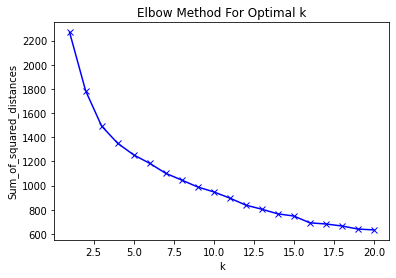

In [14]:
#define function to find the best k number        
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,21)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting(movie)

From the above figure, the optimal number of clusters is **about** $k^*=10$.